In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

In [6]:
# Define the variables

# We’ll simulate a portfolio of stocks. To do this, we need to define the symbols, the weights, and the investment amount.

# We also define the confidence level which we’ll use later.

# create your portfolio of stocks
tickers = ["AAPL", "META", "C", "DIS"]

# pick the weights of each stock (must add to 1)
weights = np.array([0.25, 0.3, 0.15, 0.3])

# the size of the portfolio
portfolio_value = 1_000

# the confidence interval (95%)
confidence = 0.05
# Now we can get the stock data for all the symbols in one line of code.

data = yf.download(tickers, start="2018-01-01", end="2021-12-31")["Close"]

data.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,C,DIS,META
Date,,,,
2018-01-02,43.064999,74.360001,111.800003,181.419998
2018-01-03,43.057499,74.589996,112.279999,184.669998
2018-01-04,43.257500,75.510002,112.230003,184.330002
2018-01-05,43.750000,75.410004,111.620003,186.850006
2018-01-08,43.587502,74.529999,110.019997,188.279999


In [7]:
# Compute portfolio statistics

# compute daily returns of each stock
returns = data.pct_change()

# compute the daily mean returns of each stock
mean_returns = returns.mean()

# compute portfolio mean return
port_mean = mean_returns.dot(weights)

# mean of investment returns
investment_mean = (1 + port_mean) * portfolio_value

# compute the portfolio covariance matrix
cov_matrix = returns.cov()

# compute portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# standard deviation of investment returns
investment_stdev = portfolio_value * port_stdev

returns.head()


,AAPL,C,DIS,META
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003093,0.004293,0.017914
2018-01-04,0.004645,0.012334,-0.000445,-0.001841
2018-01-05,0.011385,-0.001324,-0.005435,0.013671
2018-01-08,-0.003714,-0.011670,-0.014334,0.007653
...,...,...,...,...
2021-12-23,0.003644,0.010235,0.011522,0.014495
2021-12-27,0.022975,0.007308,-0.005403,0.032633
2021-12-28,-0.005767,-0.000495,0.015707,0.000116


In [8]:
# Compute VaR
# ppf takes a percentage and returns a standard deviation
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = norm.ppf(confidence, investment_mean, investment_stdev)

# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

# print it out
f"Portfolio VaR: {value_at_risk}"

'Portfolio VaR: 28.335597603904944'

### Bonus: Scaling VaR to different time frames

What about over one week? Or one month?

Stock returns increase with the square root of time. Therefore to scale the value at risk, we multiply it by the square root of time. This sounds scary but it’s simple in Python.

Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).

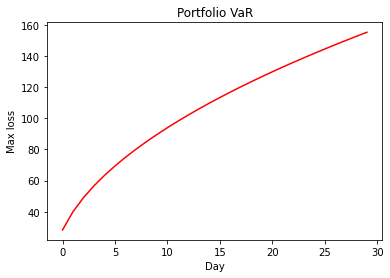

In [9]:
value_at_risks = value_at_risk * np.sqrt(range(1, 31))
# Then we plot it.

# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")

VaR is a simple measure that comes with various assumptions, caveats, and criticisms. It should be used as one of many risk management techniques. Despite its simplicity, it is a useful tool in the trader’s tool belt.